
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd

## Load the data into a DataFrame
ialiq= pd.read_csv('./Iowa_Liquor_Sales_reduced.csv')

ialiq["Date"] = pd.to_datetime(ialiq["Date"], format="%m/%d/%Y") #Converted to date time in order to extract 2015 data only
ialiq.head()

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [2]:
ialiq.drop_duplicates(inplace=True)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ialiq[['State Bottle Cost']] = ialiq[['State Bottle Cost']].replace('[\$,]','',regex=True).astype(float)  # converting $$ to floats
ialiq[['State Bottle Retail']] = ialiq[['State Bottle Retail']].replace('[\$,]','',regex=True).astype(float)
ialiq[['Sale (Dollars)']] = ialiq[['Sale (Dollars)']].replace('[\$,]','',regex=True).astype(float)
ialiq.loc[ialiq.City == 'DUNLAP', 'Zip Code'] = 51529  ## in a later cell I notice there's a bad entry for zip codes from Dunlap. Looked online and there's only one zip code associated with the city
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    print "dataframe duplicates \n", dataframe.duplicated().sum() 
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(ialiq)

missing values 
Date                         0
Store Number                 0
City                         0
Zip Code                     0
County Number            10908
County                   10908
Category                   777
Category Name             6100
Vendor Number                0
Item Number                  0
Item Description             0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64
dataframe index 
Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2709542, 2709543, 2709544, 2709545, 2709546, 2709547, 2709548,
            2709549, 2709550, 2709551],
           dtype='int64', length=2706565)
dataframe types 
Date                     datetime64[ns]
Store Number                      int64
City        

In [4]:
df = ialiq[(ialiq['Date'].dt.year == 2015)]  ## For my model I will only consider a full year of data to not unduly weight the earlier months of the year with incomplete 2016 data



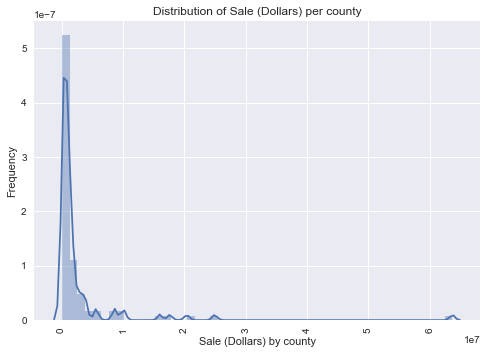

In [21]:
## Plotting some distributions of the selected variables to get an idea of the data
sns.distplot(df.groupby('County')['Sale (Dollars)'].sum())
plt.xlabel('Sale (Dollars) by county')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of Sale (Dollars) per county')
plt.show()

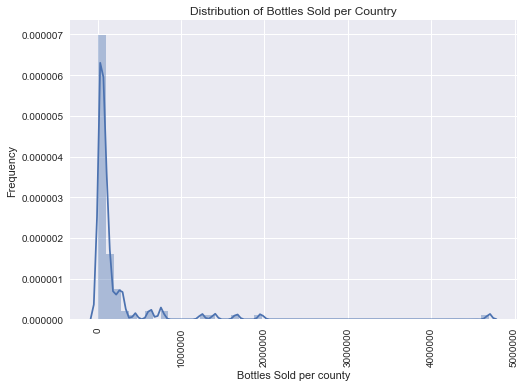

In [22]:
sns.distplot(df.groupby('County')['Bottles Sold'].sum())
plt.xlabel('Bottles Sold per county')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of Bottles Sold per Country')
plt.show()

In [7]:
## botched attempt at regularizing a model that probably didnt need it anyways


# # create an array of alpha values
# alpha_range = 10.**np.arange(-2, 3)
# print alpha_range

# # select the best alpha with RidgeCV
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import Ridge
# from sklearn import metrics
# ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
# ridgeregcv.fit(X_train, y_train)
# ridge_alpha = ridgeregcv.alpha_


# ridgereg = Ridge(alpha=ridge_alpha, normalize=True)
# l2a = ridgereg.fit(X_train, y_train)


# # predict method uses the best alpha value
# y_pred = ridgereg.predict(X_test)
# print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# ridgeregcv.coef_

In [8]:
# coef_name = ['Contant'] + list(X_test.columns)
# l2a_results = pd.DataFrame(zip(coef_name, list(l2a.coef_)), columns=['Variable', 'Coef'])
# zero_coef = l2a_results
# l2a_results.sort_values('Coef', ascending=False)

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


After performing some analysis I learned that the only quantitative variable to have some discernable shape to their distribution is the sales in Dollars. Furthermore, I notice a pattern of heavy purchases early in the week and petering off as the week progresses (no sales on weekend and holidays). Bottle per purchase peaks between 12-14 bottles, with most of the data falling on purchases below that range.

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [9]:
subdf = df.copy()
##Creating the dataframe I will use to build and train the model, using only the value to predict and the variable chosen.
subdf= pd.concat((subdf['Store Number'],subdf['County'],subdf['Sale (Dollars)'], subdf['State Bottle Retail'], subdf['Bottle Volume (ml)'], subdf['Bottles Sold']), axis=1)
subdf.head()

,Store Number,County,Sale (Dollars),State Bottle Retail,Bottle Volume (ml),Bottles Sold
525069,3400,Polk,115.92,4.83,375,24
525070,4165,Polk,68.40,11.40,1750,6
525071,4617,Polk,68.40,11.40,1750,6
525072,5089,Harrison,21.00,10.50,750,2
525073,4695,Polk,161.64,13.47,750,12


In [10]:
highsales = subdf.groupby('County')['Sale (Dollars)'].agg(['sum'])
highsales.columns = ['Total Sales']
## Figuring out top performer by Sales to use as a control variable

highsales.sort_values('Total Sales', ascending=False).head()

,Total Sales
County,
Polk,6.366446e+07
Linn,2.496467e+07
Scott,2.040843e+07
Johnson,1.765669e+07
Black Hawk,1.603065e+07


In [11]:
county_dummies = pd.get_dummies(subdf['County']).iloc[:, 1:]
subdf = pd.concat((subdf, county_dummies), axis=1) ## Setting up dummies to use as variables in the model
subdf.head()

,Store Number,County,Sale (Dollars),State Bottle Retail,Bottle Volume (ml),Bottles Sold,Adams,Allamakee,Appanoose,Audubon,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
525069,3400,Polk,115.92,4.83,375,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525070,4165,Polk,68.40,11.40,1750,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525071,4617,Polk,68.40,11.40,1750,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525072,5089,Harrison,21.00,10.50,750,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525073,4695,Polk,161.64,13.47,750,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

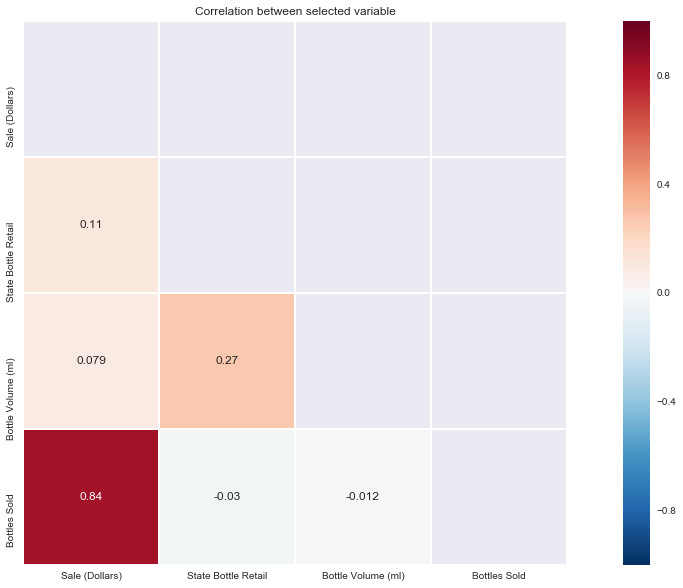

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
uptri = np.zeros_like((subdf[['County', 'Sale (Dollars)', 'State Bottle Retail', 'Bottle Volume (ml)', 'Bottles Sold']].corr()), dtype=np.bool)
uptri[np.triu_indices_from(uptri)] = True
## Heatmapping the variables to figure out the strength of the correlations
sns.heatmap((subdf[['County', 'Sale (Dollars)', 'State Bottle Retail', 'Bottle Volume (ml)', 'Bottles Sold']].corr()), mask=uptri, center=0, square=True, linewidths=0.5, annot = True)
plt.title('Correlation between selected variable')

plt.show()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [13]:
import statsmodels.api as sm

X= subdf[['State Bottle Retail', 'Bottle Volume (ml)', 'Bottles Sold']]
y = subdf['Sale (Dollars)']
X = sm.add_constant(X)
## Model using Bottle retail, Bott volume, and Bo sold as variable to output Sale (Dollars)
mod = sm.OLS(y, X).fit()
predictions = mod.predict(X)
mod.summary()

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 1.897e+06
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:16:10   Log-Likelihood:            -1.4800e+07
No. Observations:             2181964   AIC:                         2.960e+07
Df Residuals:                 2181960   BIC:                         2.960e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -85.2067      0.303   -281.526      0.000     -85.800     -84.613
State Bottle Retail     2.1136      0.007    308.565      0.000       2.100       2.127
Bottle Volume (ml)      0.0452      0.000    156.906      0.000       0.045       0.046
Bottles Sold           14.4167      0.006   2362.565      0.000      14.405      14.429
==============================================================================
Omnibus:                  4712045.265   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1275727605279.838
Skew:                          17.801   Prob(JB):                         0.00
Kurtosis:                    3748.771   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

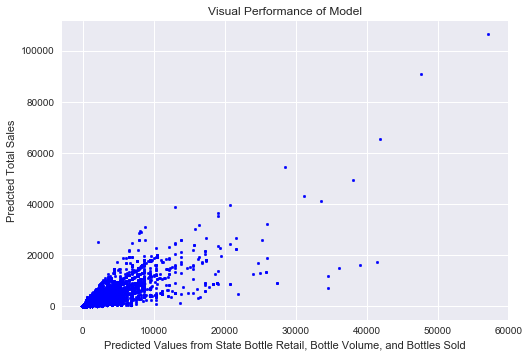

MSE: 86486368765.3


In [14]:
## Plot of resutling values of the model
plt.scatter(predictions, y, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from State Bottle Retail, Bottle Volume, and Bottles Sold")
plt.ylabel("Predcted Total Sales")
plt.title("Visual Performance of Model")
plt.show()
print "MSE:", mod.mse_model

In [15]:
features = subdf.columns.values.tolist()

features.remove('Sale (Dollars)')
features.remove('County')
features.remove('Store Number')
features.remove('Polk')

X = subdf[features]
y = subdf['Sale (Dollars)']
X = sm.add_constant(X)
## Using the model displayed above, we perform a train/test split and train the data accordingly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

mod = sm.OLS(y_train, X_train).fit()
predictions = mod.predict(X_test)
# print np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:         Sale (Dollars)   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 4.259e+04
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:16:44   Log-Likelihood:            -1.1085e+07
No. Observations:             1636473   AIC:                         2.217e+07
Df Residuals:                 1636372   BIC:                         2.217e+07
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -77.3292    

In [16]:
yhattable = pd.concat((predictions, X_test), axis=1)

# Append predictions to the x_test set in order to fulfill project ask of providing predictions. I'm aware that I address that in the following cell, but for the sace of completeness, I have included it
yhattable=yhattable.rename(columns = {0:'Predictions'})
yhattable.head()

,Predictions,const,State Bottle Retail,Bottle Volume (ml),Bottles Sold,Adams,Allamakee,Appanoose,Audubon,Benton,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
696269,-30.589105,1.0,3.42,375,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1893436,22.082557,1.0,12.39,750,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2253302,153.652083,1.0,44.58,3000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082168,51.865728,1.0,11.51,1750,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1411943,139.176038,1.0,6.60,750,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [17]:
coefer = pd.DataFrame(mod.params).reset_index()
coefer.columns = ['County', 'Coef']  ## dataframing and sorting the coefficients from the model to pick out the best predicted performers.

In [18]:
coefer.sort_values('Coef', ascending=False).head(10)

,County,Coef
27,Dallas,54.934949
3,Bottles Sold,14.284094
16,Carroll,10.436126
85,Sioux,8.312685
54,Johnson,6.424826
26,Crawford,5.698065
47,Howard,5.267181
77,Plymouth,5.230137
22,Clarke,5.160851
32,Dickinson,4.940706


In [19]:
plt.scatter(X_test, predictions, s=30, c='b', marker='.', zorder=10)
plt.xlabel("Predicted Values from State Bottle Retail, Bottle Volume, and Bottles Sold")
plt.ylabel("Predicted Total Sales")
plt.title("Visual Performance of Model")
plt.show()
print "MSE:", mod.mse_model



ValueError: x and y must be the same size

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

According to the model created, the best performers when compared to Polk county are as in the table above.


 
The result, or “Coef” on the table, are the predicted amount of extra dollars per purchase order to the state of Iowa, when compared to the purchase order from Polk county.

For that reason, the model recommends Dallas, Carroll, Sioux, and Johnson counties to start the next store. 
